In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
# Drop the first row and column (headers)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
# Apply normalization
chargingprofile1 = min_max_normalize(chargingprofile1)
chargingprofile1_time_series = chargingprofile1

chargingprofile2 = pd.read_csv('./data/yearly_charging_profile_2.csv', header=None)
chargingprofile2 = chargingprofile2.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile2.index = range(1, len(chargingprofile2) + 1)
chargingprofile2 = min_max_normalize(chargingprofile2)

chargingprofile3 = pd.read_csv('./data/yearly_charging_profile_3.csv', header=None)
chargingprofile3 = chargingprofile3.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile3.index = range(1, len(chargingprofile3) + 1)
chargingprofile3 = min_max_normalize(chargingprofile3)

Per day: 96x365 => 1x365

In [2]:
#time series
   
for kw in [2.5, 7, 11, 23]:
    charging_kw = chargingprofile1_time_series*kw
    print("charger kw", kw, " : min, max, yearly load")
    print(round(charging_kw.min().min(),2))
    print(round(charging_kw.max().max(),2))
    print(round((charging_kw/4).values.sum(),2))

    print("charger kw", kw, " : mean, std, var, skew, kurt")
    print(round(charging_kw.mean().mean(),2))
    print(round(charging_kw.std().mean(),2))
    print(round(charging_kw.var().mean(),2))
    print(round(charging_kw.skew().mean(),2))
    print(round(charging_kw.kurt().mean(),2))

charger kw 2.5  : min, max, yearly load
0.0
2.5
1830.34
charger kw 2.5  : mean, std, var, skew, kurt
0.21
0.65
0.44
3.37
10.65
charger kw 7  : min, max, yearly load
0.0
7.0
5124.95
charger kw 7  : mean, std, var, skew, kurt
0.59
1.82
3.47
3.37
10.65
charger kw 11  : min, max, yearly load
0.0
11.0
8053.49
charger kw 11  : mean, std, var, skew, kurt
0.92
2.87
8.56
3.37
10.65
charger kw 23  : min, max, yearly load
0.0
23.0
16839.12
charger kw 23  : mean, std, var, skew, kurt
1.92
6.0
37.41
3.37
10.65


In [3]:
#first difference on the columns
   
for kw in [2.5, 7, 11, 23]:
    charging_kw = chargingprofile1_time_series*kw
    charging_kw = charging_kw.diff().iloc[1:]
    print("charger kw", kw, " : min, max")
    print(round(charging_kw.min().min(),2))
    print(round(charging_kw.max().max(),2))

    print("charger kw", kw, " : mean, std, var, skew, kurt")
    print(round(charging_kw.abs().mean().mean(),2))
    print(round(charging_kw.std().mean(),2))
    print(round(charging_kw.var().mean(),2))
    print(round(charging_kw.skew().mean(),2))
    print(round(charging_kw.kurt().mean(),2))

charger kw 2.5  : min, max
-2.5
2.5
charger kw 2.5  : mean, std, var, skew, kurt
0.05
0.35
0.12
0.88
47.68
charger kw 7  : min, max
-7.0
7.0
charger kw 7  : mean, std, var, skew, kurt
0.15
0.98
0.97
0.88
47.68
charger kw 11  : min, max
-11.0
11.0
charger kw 11  : mean, std, var, skew, kurt
0.23
1.54
2.39
0.88
47.68
charger kw 23  : min, max
-23.0
23.0
charger kw 23  : mean, std, var, skew, kurt
0.48
3.23
10.45
0.88
47.68


Statistical moments

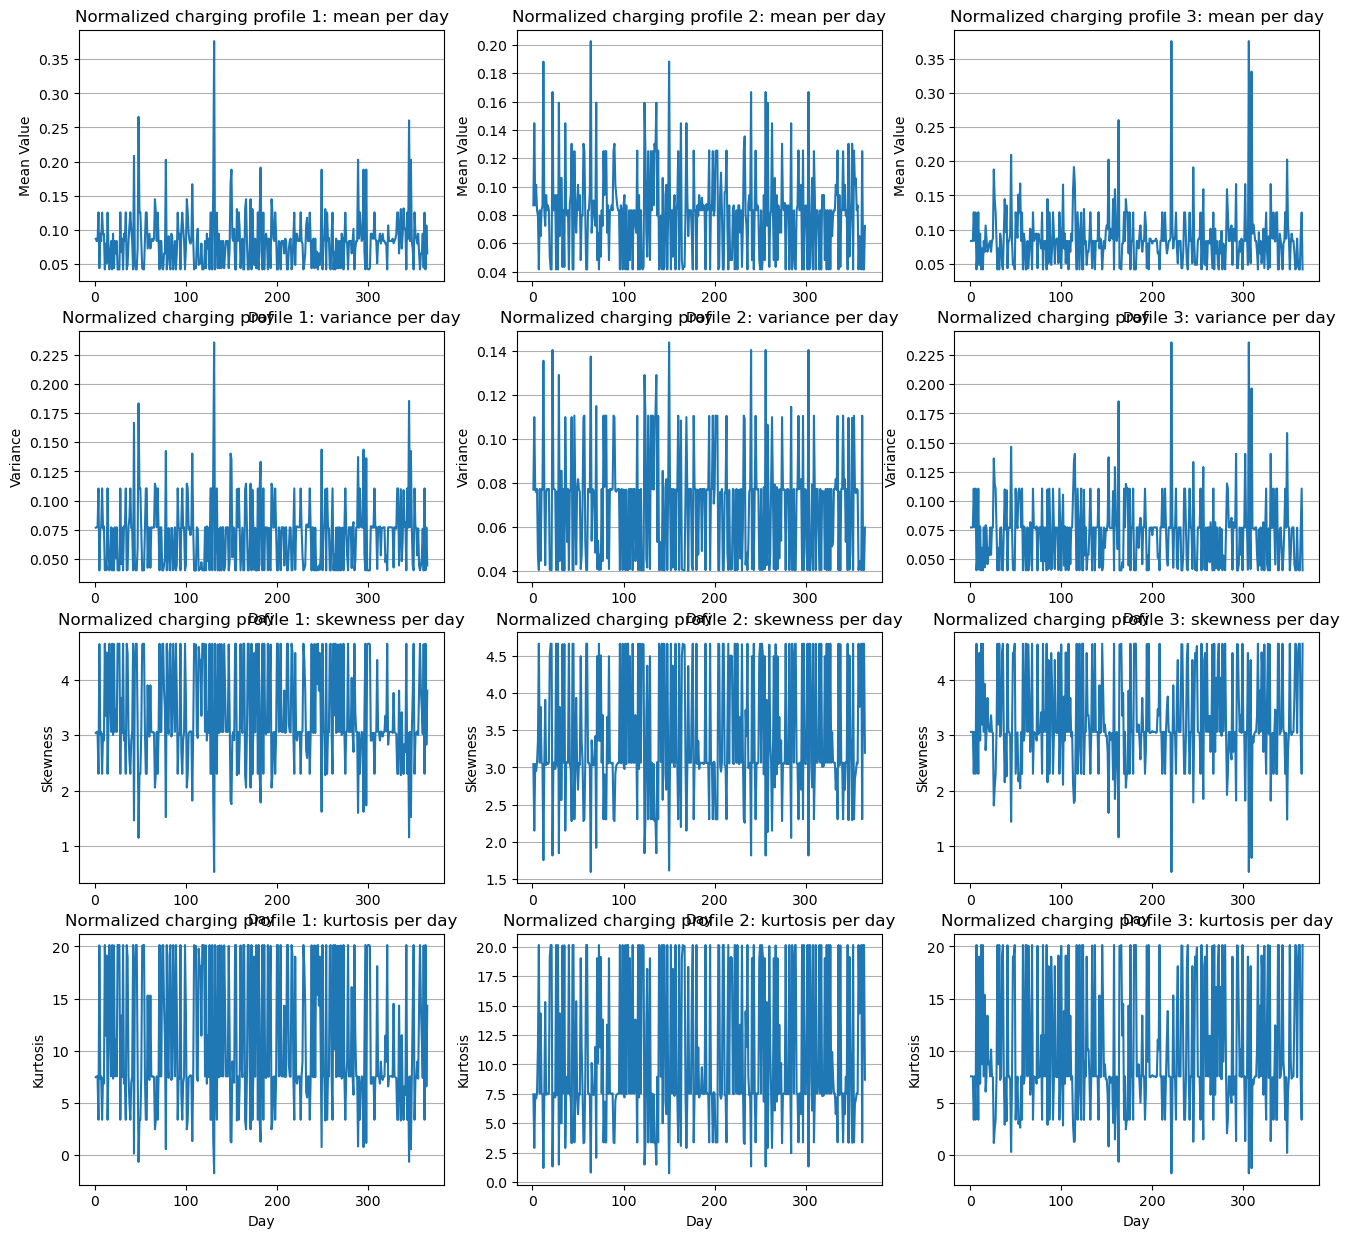

In [4]:
charging1_mean = chargingprofile1.mean(axis=0)
charging1_var = chargingprofile1.var(axis=0)
charging1_skew = chargingprofile1.skew(axis=0)
charging1_kurt = chargingprofile1.kurt(axis=0)

charging2_mean = chargingprofile2.mean(axis=0)
charging2_var = chargingprofile2.var(axis=0)
charging2_skew = chargingprofile2.skew(axis=0)
charging2_kurt = chargingprofile2.kurt(axis=0)

charging3_mean = chargingprofile3.mean(axis=0)
charging3_var = chargingprofile3.var(axis=0)
charging3_skew = chargingprofile3.skew(axis=0)
charging3_kurt = chargingprofile3.kurt(axis=0)

fig, axs = plt.subplots(4, 3, figsize=(16, 15))
#Mean
axs[0,0].plot(charging1_mean.index, charging1_mean)
axs[0,0].set_title('Normalized charging profile 1: mean per day')
axs[0,0].set_xlabel('Day')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(charging2_mean.index, charging2_mean)
axs[0,1].set_title('Normalized charging profile 2: mean per day')
axs[0,1].set_xlabel('Day')
axs[0,1].set_ylabel('Mean Value')
axs[0,1].grid(axis='y')

axs[0,2].plot(charging3_mean.index, charging3_mean)
axs[0,2].set_title('Normalized charging profile 3: mean per day')
axs[0,2].set_xlabel('Day')
axs[0,2].set_ylabel('Mean Value')
axs[0,2].grid(axis='y')

#Variance
axs[1,0].plot(charging1_var.index, charging1_var)
axs[1,0].set_title('Normalized charging profile 1: variance per day')
axs[1,0].set_xlabel('Day')
axs[1,0].set_ylabel('Variance')
axs[1,0].grid(axis='y')

axs[1,1].plot(charging2_var.index, charging2_var)
axs[1,1].set_title('Normalized charging profile 2: variance per day')
axs[1,1].set_xlabel('Day')
axs[1,1].set_ylabel('Variance')
axs[1,1].grid(axis='y')

axs[1,2].plot(charging3_var.index, charging3_var)
axs[1,2].set_title('Normalized charging profile 3: variance per day')
axs[1,2].set_xlabel('Day')
axs[1,2].set_ylabel('Variance')
axs[1,2].grid(axis='y')

#Skewness
axs[2,0].plot(charging1_skew.index, charging1_skew)
axs[2,0].set_title('Normalized charging profile 1: skewness per day')
axs[2,0].set_xlabel('Day')
axs[2,0].set_ylabel('Skewness')
axs[2,0].grid(axis='y')

axs[2,1].plot(charging2_skew.index, charging2_skew)
axs[2,1].set_title('Normalized charging profile 2: skewness per day')
axs[2,1].set_xlabel('Day')
axs[2,1].set_ylabel('Skewness')
axs[2,1].grid(axis='y')

axs[2,2].plot(charging3_skew.index, charging3_skew)
axs[2,2].set_title('Normalized charging profile 3: skewness per day')
axs[2,2].set_xlabel('Day')
axs[2,2].set_ylabel('Skewness')
axs[2,2].grid(axis='y')

#Kurtosis
axs[3,0].plot(charging1_kurt.index, charging1_kurt)
axs[3,0].set_title('Normalized charging profile 1: kurtosis per day')
axs[3,0].set_xlabel('Day')
axs[3,0].set_ylabel('Kurtosis')
axs[3,0].grid(axis='y')

axs[3,1].plot(charging2_kurt.index, charging2_kurt)
axs[3,1].set_title('Normalized charging profile 2: kurtosis per day')
axs[3,1].set_xlabel('Day')
axs[3,1].set_ylabel('Kurtosis')
axs[3,1].grid(axis='y')

axs[3,2].plot(charging3_kurt.index, charging3_kurt)
axs[3,2].set_title('Normalized charging profile 3: kurtosis per day')
axs[3,2].set_xlabel('Day')
axs[3,2].set_ylabel('Kurtosis')
axs[3,2].grid(axis='y')

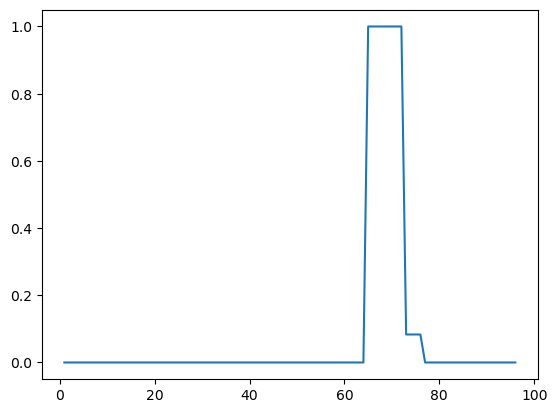

In [5]:
plt.plot(chargingprofile1[1])

In [6]:
# Mean of the statistical moments
print('MEAN')
charging1_mean_mean = charging1_mean.mean()
print(round(charging1_mean_mean, 2))
charging2_mean_mean = charging2_mean.mean()
print(round(charging2_mean_mean, 2))
charging3_mean_mean = charging3_mean.mean()
print(round(charging3_mean_mean, 2))

print('VAR')
charging1_mean_var = charging1_var.mean()
print(round(charging1_mean_var, 2))
charging2_mean_var = charging2_var.mean()
print(round(charging2_mean_var, 2))
charging3_mean_var = charging3_var.mean()
print(round(charging3_mean_var, 2))

print('SKEW')
charging1_mean_skew = charging1_skew.mean()
print(round(charging1_mean_skew, 2))
charging2_mean_skew = charging2_skew.mean()
print(round(charging2_mean_skew, 2))
charging3_mean_skew = charging3_skew.mean()
print(round(charging3_mean_skew, 2))

print('KURT')
charging1_mean_kurt = charging1_kurt.mean()
print(round(charging1_mean_kurt, 2))
charging2_mean_kurt = charging2_kurt.mean()
print(round(charging2_mean_kurt, 2))
charging3_mean_kurt = charging3_kurt.mean()
print(round(charging3_mean_kurt, 2))

MEAN
0.08
0.08
0.09
VAR
0.07
0.07
0.07
SKEW
3.37
3.39
3.28
KURT
10.65
10.7
10.0


First difference

In [7]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
# Drop the first row and column (headers)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
# Apply normalization
chargingprofile1 = min_max_normalize(chargingprofile1)
chargingprofile1 = chargingprofile1*23
#chargingprofile1 = chargingprofile1.diff().iloc[1:]
chargingprofile1 = chargingprofile1.diff(axis=1).drop(chargingprofile1.columns[0], axis=1)

chargingprofile2 = pd.read_csv('./data/yearly_charging_profile_2.csv', header=None)
chargingprofile2 = chargingprofile2.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile2.index = range(1, len(chargingprofile2) + 1)
chargingprofile2 = min_max_normalize(chargingprofile2)

#chargingprofile2 = chargingprofile2.diff().iloc[1:]
chargingprofile2 = chargingprofile2.diff(axis=1).drop(chargingprofile2.columns[0], axis=1)

chargingprofile3 = pd.read_csv('./data/yearly_charging_profile_3.csv', header=None)
chargingprofile3 = chargingprofile3.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile3.index = range(1, len(chargingprofile3) + 1)
chargingprofile3 = min_max_normalize(chargingprofile3)

#chargingprofile3 = chargingprofile3.diff().iloc[1:]
chargingprofile = chargingprofile3.diff(axis=1).drop(chargingprofile3.columns[0], axis=1)


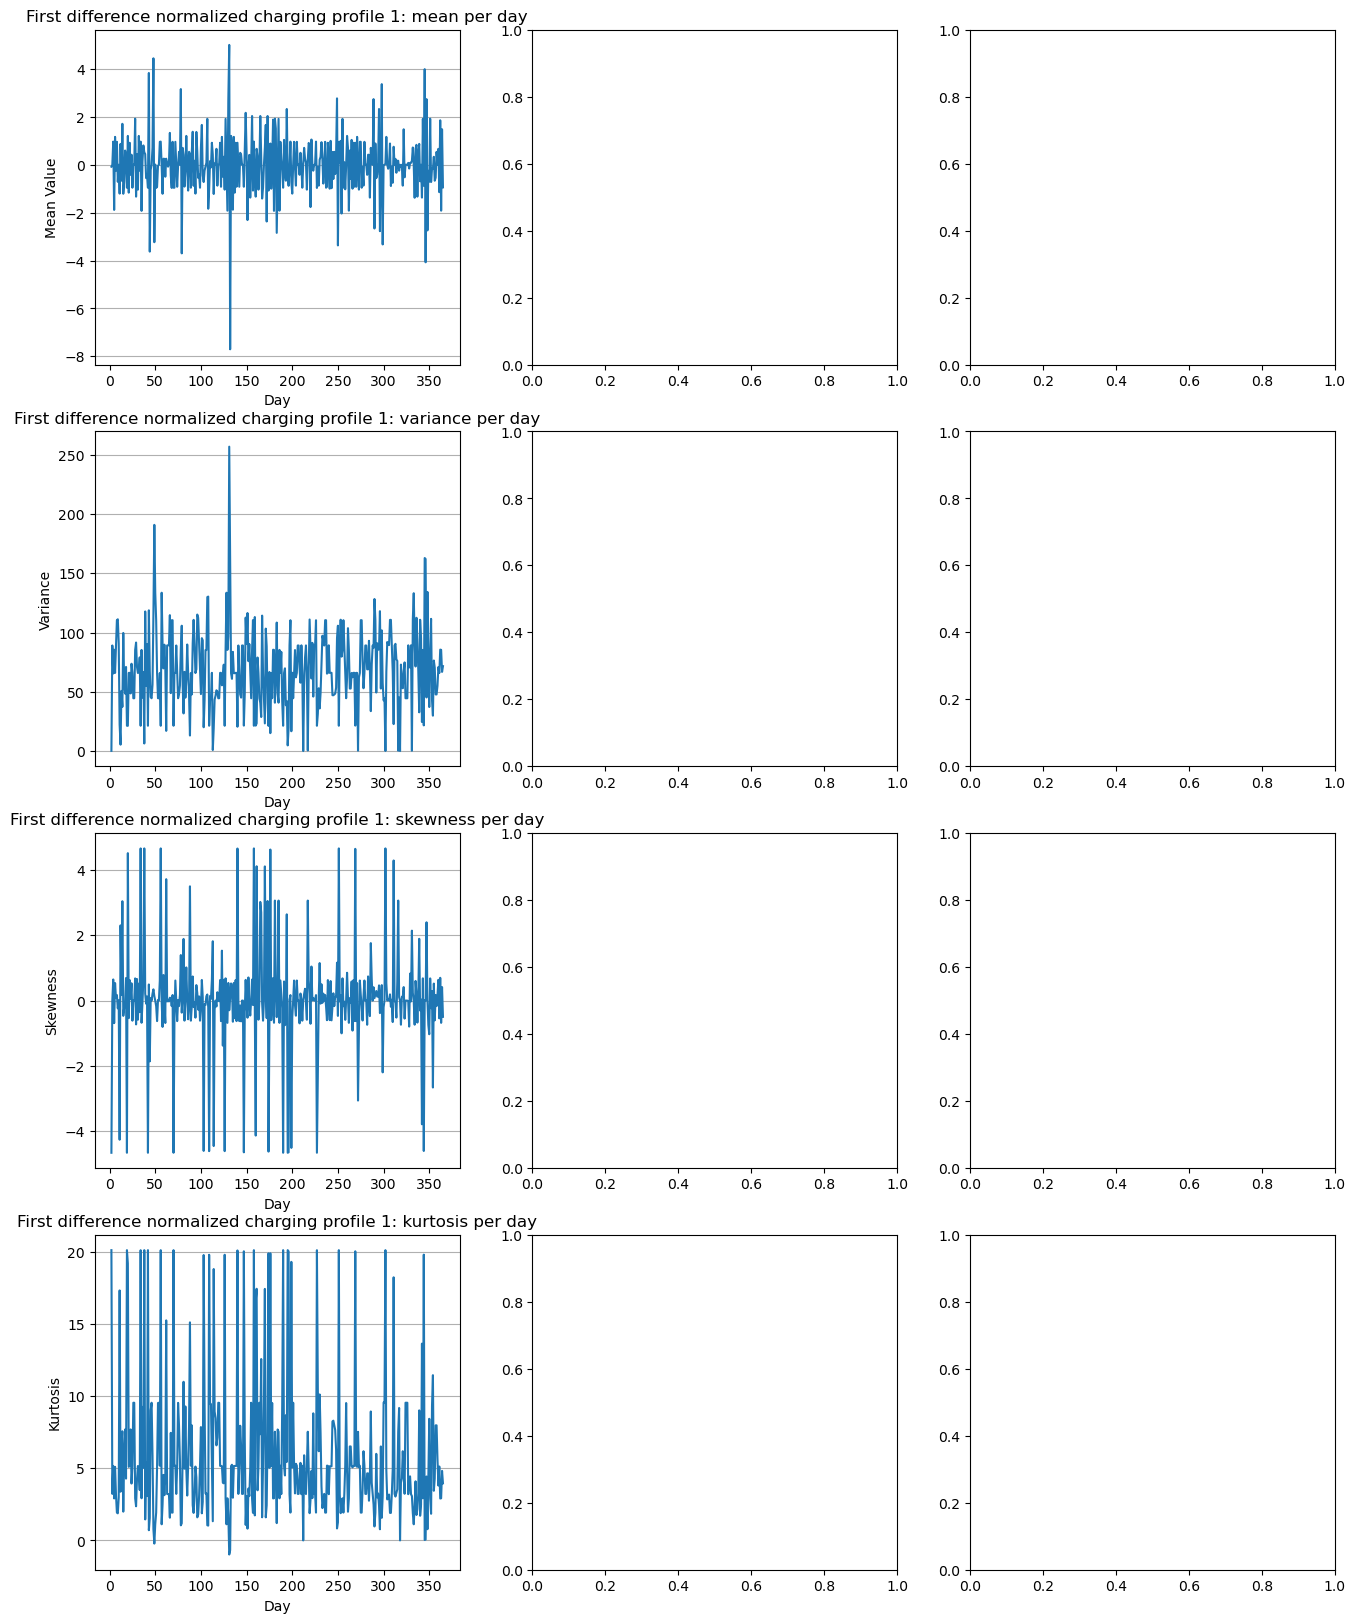

In [8]:
charging1_mean = chargingprofile1.mean(axis=0)
charging1_var = chargingprofile1.var(axis=0)
charging1_skew = chargingprofile1.skew(axis=0)
charging1_kurt = chargingprofile1.kurt(axis=0)

charging2_mean = chargingprofile2.mean(axis=0)
charging2_var = chargingprofile2.var(axis=0)
charging2_skew = chargingprofile2.skew(axis=0)
charging2_kurt = chargingprofile2.kurt(axis=0)

charging3_mean = chargingprofile3.mean(axis=0)
charging3_var = chargingprofile3.var(axis=0)
charging3_skew = chargingprofile3.skew(axis=0)
charging3_kurt = chargingprofile3.kurt(axis=0)

fig, axs = plt.subplots(4, 3, figsize=(16, 20))
#Mean
axs[0,0].plot(charging1_mean.index, charging1_mean)
axs[0,0].set_title('First difference normalized charging profile 1: mean per day')
axs[0,0].set_xlabel('Day')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

# axs[0,1].plot(charging2_mean.index, charging2_mean)
# axs[0,1].set_title('First difference charging profile 2: mean per day')
# axs[0,1].set_xlabel('Day')
# axs[0,1].set_ylabel('Mean Value')
# axs[0,1].grid(axis='y')

# axs[0,2].plot(charging3_mean.index, charging3_mean)
# axs[0,2].set_title('First difference normalized charging profile 3: mean per day')
# axs[0,2].set_xlabel('Day')
# axs[0,2].set_ylabel('Mean Value')
# axs[0,2].grid(axis='y')

#Variance
axs[1,0].plot(charging1_var.index, charging1_var)
axs[1,0].set_title('First difference normalized charging profile 1: variance per day')
axs[1,0].set_xlabel('Day')
axs[1,0].set_ylabel('Variance')
axs[1,0].grid(axis='y')

# axs[1,1].plot(charging2_var.index, charging2_var)
# axs[1,1].set_title('First difference normalized charging profile 2: variance per day')
# axs[1,1].set_xlabel('Day')
# axs[1,1].set_ylabel('Variance')
# axs[1,1].grid(axis='y')

# axs[1,2].plot(charging3_var.index, charging3_var)
# axs[1,2].set_title('First difference normalized charging profile 3: variance per day')
# axs[1,2].set_xlabel('Day')
# axs[1,2].set_ylabel('Variance')
# axs[1,2].grid(axis='y')

#Skewness
axs[2,0].plot(charging1_skew.index, charging1_skew)
axs[2,0].set_title('First difference normalized charging profile 1: skewness per day')
axs[2,0].set_xlabel('Day')
axs[2,0].set_ylabel('Skewness')
axs[2,0].grid(axis='y')

# axs[2,1].plot(charging2_skew.index, charging2_skew)
# axs[2,1].set_title('First difference normalized charging profile 2: skewness per day')
# axs[2,1].set_xlabel('Day')
# axs[2,1].set_ylabel('Skewness')
# axs[2,1].grid(axis='y')

# axs[2,2].plot(charging3_skew.index, charging3_skew)
# axs[2,2].set_title('First difference normalized charging profile 3: skewness per day')
# axs[2,2].set_xlabel('Day')
# axs[2,2].set_ylabel('Skewness')
# axs[2,2].grid(axis='y')

# #Kurtosis
axs[3,0].plot(charging1_kurt.index, charging1_kurt)
axs[3,0].set_title('First difference normalized charging profile 1: kurtosis per day')
axs[3,0].set_xlabel('Day')
axs[3,0].set_ylabel('Kurtosis')
axs[3,0].grid(axis='y')

# axs[3,1].plot(charging2_kurt.index, charging2_kurt)
# axs[3,1].set_title('First difference normalized charging profile 2: kurtosis per day')
# axs[3,1].set_xlabel('Day')
# axs[3,1].set_ylabel('Kurtosis')
# axs[3,1].grid(axis='y')

# axs[3,2].plot(charging3_kurt.index, charging3_kurt)
# axs[3,2].set_title('First difference normalized charging profile 3: kurtosis per day')
# axs[3,2].set_xlabel('Day')
# axs[3,2].set_ylabel('Kurtosis')
# axs[3,2].grid(axis='y')

In [9]:
# Mean of the statistical moments
print('MEAN')
charging1_mean_mean = charging1_mean.mean()
print(round(charging1_mean_mean, 2))
charging2_mean_mean = charging2_mean.mean()
print(round(charging2_mean_mean, 2))
charging3_mean_mean = charging3_mean.mean()
print(round(charging3_mean_mean, 2))

print('VAR')
charging1_mean_var = charging1_var.mean()
print(round(charging1_mean_var, 2))
charging2_mean_var = charging2_var.mean()
print(round(charging2_mean_var, 2))
charging3_mean_var = charging3_var.mean()
print(round(charging3_mean_var, 2))

print('SKEW')
charging1_mean_skew = charging1_skew.mean()
print(round(charging1_mean_skew, 2))
charging2_mean_skew = charging2_skew.mean()
print(round(charging2_mean_skew, 2))
charging3_mean_skew = charging3_skew.mean()
print(round(charging3_mean_skew, 2))

print('KURT')
charging1_mean_kurt = charging1_kurt.mean()
print(round(charging1_mean_kurt, 2))
charging2_mean_kurt = charging2_kurt.mean()
print(round(charging2_mean_kurt, 2))
charging3_mean_kurt = charging3_kurt.mean()
print(round(charging3_mean_kurt, 2))

MEAN
-0.0
-0.0
0.09
VAR
69.15
0.13
0.07
SKEW
0.02
-0.03
3.28
KURT
5.94
5.56
10.0


Second difference

In [10]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
# Drop the first row and column (headers)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
# Apply normalization
chargingprofile1 = min_max_normalize(chargingprofile1)
chargingprofile1 = chargingprofile1*23
#chargingprofile1 = chargingprofile1.diff().iloc[1:].diff().iloc[1:]
chargingprofile1 = chargingprofile1.diff(axis=1).diff(axis=1).drop(chargingprofile1.columns[0:2], axis=1)

chargingprofile2 = pd.read_csv('./data/yearly_charging_profile_2.csv', header=None)
chargingprofile2 = chargingprofile2.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile2.index = range(1, len(chargingprofile2) + 1)
chargingprofile2 = min_max_normalize(chargingprofile2)

chargingprofile2 = chargingprofile2.diff().iloc[1:].diff().iloc[1:]
#chargingprofile2 = chargingprofile2.diff(axis=1).diff(axis=1).drop(chargingprofile2.columns[0:2], axis=1)

chargingprofile3 = pd.read_csv('./data/yearly_charging_profile_3.csv', header=None)
chargingprofile3 = chargingprofile3.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile3.index = range(1, len(chargingprofile3) + 1)
chargingprofile3 = min_max_normalize(chargingprofile3)

chargingprofile3 = chargingprofile3.diff().iloc[1:].diff().iloc[1:]
#chargingprofile3 = chargingprofile3.diff(axis=1).diff(axis=1).drop(chargingprofile3.columns[0:2], axis=1)


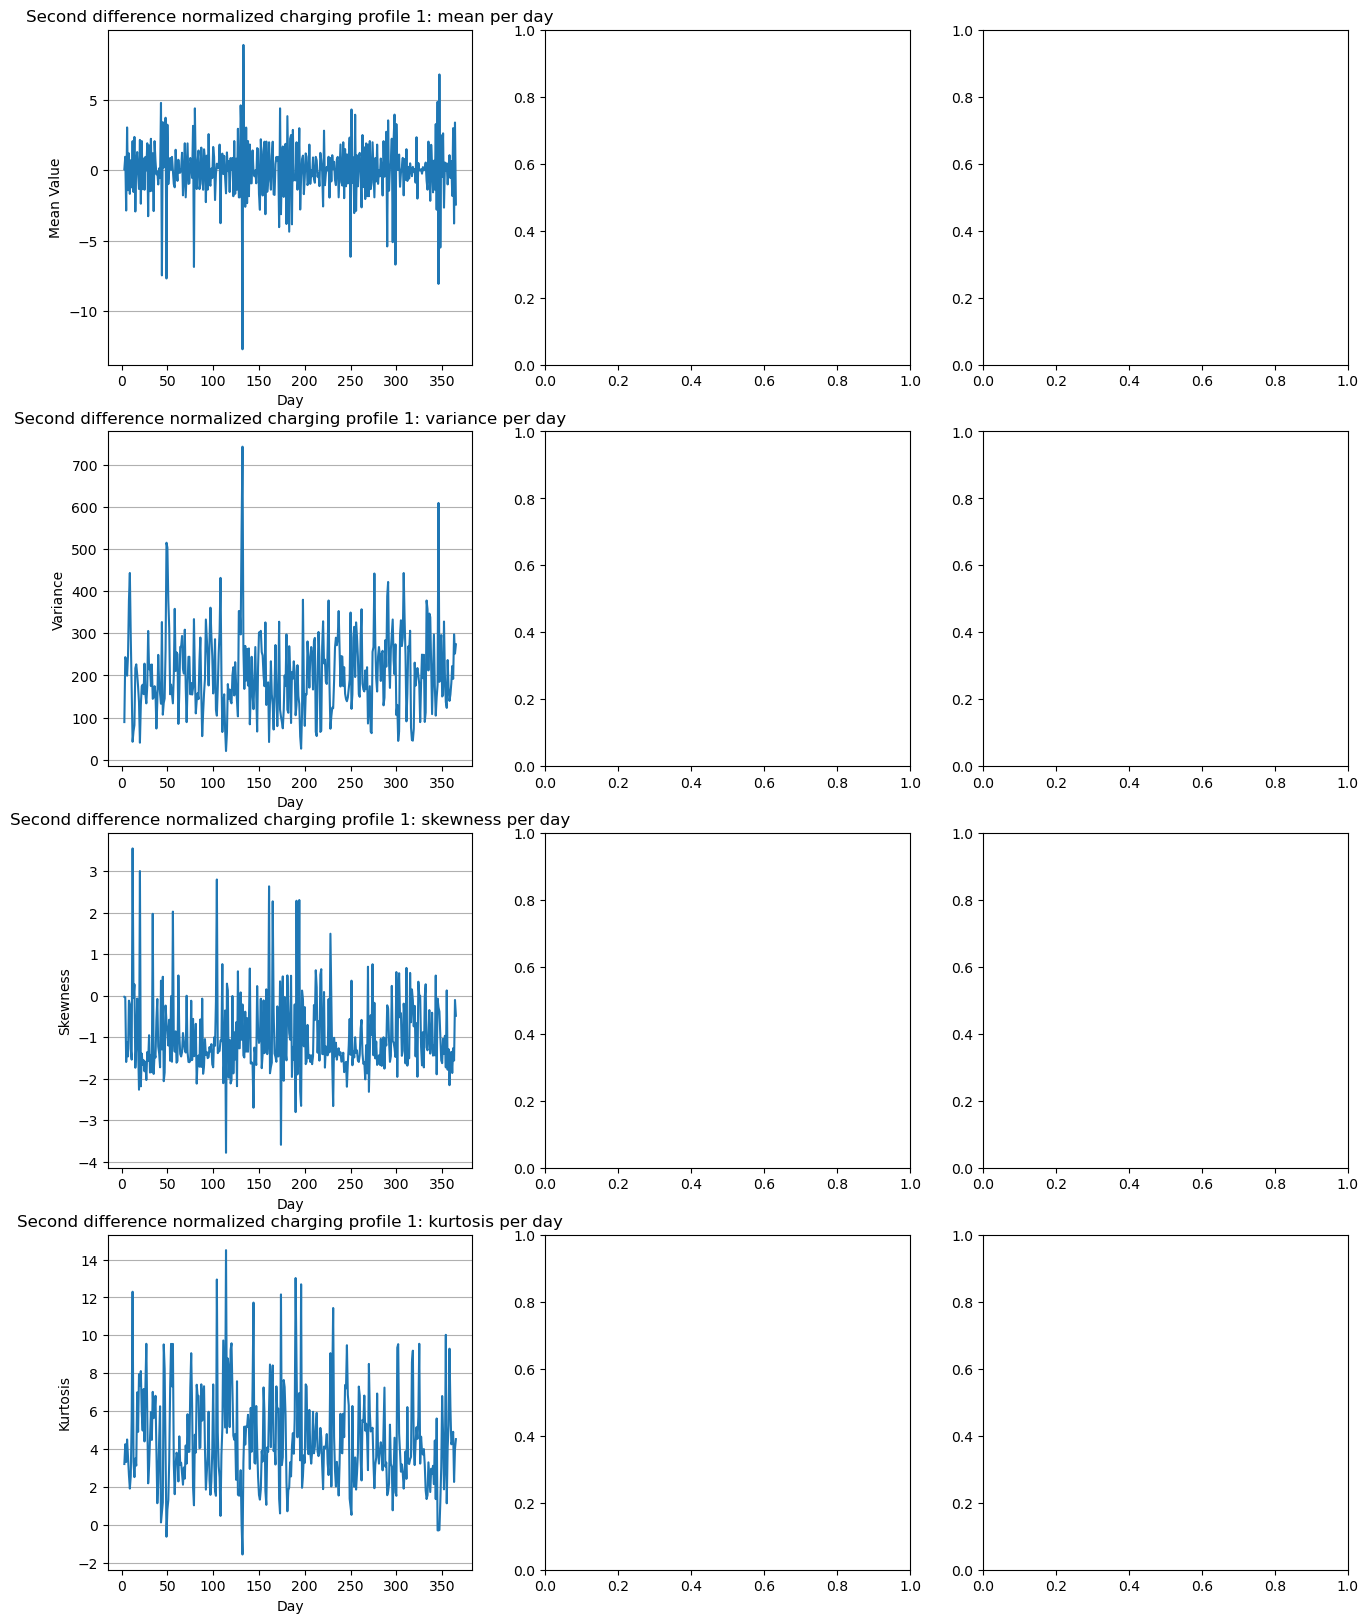

In [11]:
charging1_mean = chargingprofile1.mean(axis=0)
charging1_var = chargingprofile1.var(axis=0)
charging1_skew = chargingprofile1.skew(axis=0)
charging1_kurt = chargingprofile1.kurt(axis=0)

charging2_mean = chargingprofile2.mean(axis=0)
charging2_var = chargingprofile2.var(axis=0)
charging2_skew = chargingprofile2.skew(axis=0)
charging2_kurt = chargingprofile2.kurt(axis=0)

charging3_mean = chargingprofile3.mean(axis=0)
charging3_var = chargingprofile3.var(axis=0)
charging3_skew = chargingprofile3.skew(axis=0)
charging3_kurt = chargingprofile3.kurt(axis=0)

fig, axs = plt.subplots(4, 3, figsize=(16, 20))
#Mean
axs[0,0].plot(charging1_mean.index, charging1_mean)
axs[0,0].set_title('Second difference normalized charging profile 1: mean per day')
axs[0,0].set_xlabel('Day')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

# axs[0,1].plot(charging2_mean.index, charging2_mean)
# axs[0,1].set_title('Second difference normalized charging profile 2: mean per day')
# axs[0,1].set_xlabel('Day')
# axs[0,1].set_ylabel('Mean Value')
# axs[0,1].grid(axis='y')

# axs[0,2].plot(charging3_mean.index, charging3_mean)
# axs[0,2].set_title('Second difference normalized charging profile 3: mean per day')
# axs[0,2].set_xlabel('Day')
# axs[0,2].set_ylabel('Mean Value')
# axs[0,2].grid(axis='y')

#Variance
axs[1,0].plot(charging1_var.index, charging1_var)
axs[1,0].set_title('Second difference normalized charging profile 1: variance per day')
axs[1,0].set_xlabel('Day')
axs[1,0].set_ylabel('Variance')
axs[1,0].grid(axis='y')

# axs[1,1].plot(charging2_var.index, charging2_var)
# axs[1,1].set_title('Second difference normalized charging profile 2: variance per day')
# axs[1,1].set_xlabel('Day')
# axs[1,1].set_ylabel('Variance')
# axs[1,1].grid(axis='y')

# axs[1,2].plot(charging3_var.index, charging3_var)
# axs[1,2].set_title('Second difference normalized charging profile 3: variance per day')
# axs[1,2].set_xlabel('Day')
# axs[1,2].set_ylabel('Variance')
# axs[1,2].grid(axis='y')

#Skewness
axs[2,0].plot(charging1_skew.index, charging1_skew)
axs[2,0].set_title('Second difference normalized charging profile 1: skewness per day')
axs[2,0].set_xlabel('Day')
axs[2,0].set_ylabel('Skewness')
axs[2,0].grid(axis='y')

# axs[2,1].plot(charging2_skew.index, charging2_skew)
# axs[2,1].set_title('Second difference normalized charging profile 2: skewness per day')
# axs[2,1].set_xlabel('Day')
# axs[2,1].set_ylabel('Skewness')
# axs[2,1].grid(axis='y')

# axs[2,2].plot(charging3_skew.index, charging3_skew)
# axs[2,2].set_title('Second difference normalized charging profile 3: skewness per day')
# axs[2,2].set_xlabel('Day')
# axs[2,2].set_ylabel('Skewness')
# axs[2,2].grid(axis='y')

#Kurtosis
axs[3,0].plot(charging1_kurt.index, charging1_kurt)
axs[3,0].set_title('Second difference normalized charging profile 1: kurtosis per day')
axs[3,0].set_xlabel('Day')
axs[3,0].set_ylabel('Kurtosis')
axs[3,0].grid(axis='y')

# axs[3,1].plot(charging2_kurt.index, charging2_kurt)
# axs[3,1].set_title('Second difference normalized charging profile 2: kurtosis per day')
# axs[3,1].set_xlabel('Day')
# axs[3,1].set_ylabel('Kurtosis')
# axs[3,1].grid(axis='y')

# axs[3,2].plot(charging3_kurt.index, charging3_kurt)
# axs[3,2].set_title('Second difference normalized charging profile 3: kurtosis per day')
# axs[3,2].set_xlabel('Day')
# axs[3,2].set_ylabel('Kurtosis')
# axs[3,2].grid(axis='y')

In [12]:
# Mean of the statistical moments
print('MEAN')
charging1_mean_mean = charging1_mean.mean()
print(round(charging1_mean_mean, 2))
charging2_mean_mean = charging2_mean.mean()
print(round(charging2_mean_mean, 2))
charging3_mean_mean = charging3_mean.mean()
print(round(charging3_mean_mean, 2))

print('VAR')
charging1_mean_var = charging1_var.mean()
print(round(charging1_mean_var, 2))
charging2_mean_var = charging2_var.mean()
print(round(charging2_mean_var, 2))
charging3_mean_var = charging3_var.mean()
print(round(charging3_mean_var, 2))

print('SKEW')
charging1_mean_skew = charging1_skew.mean()
print(round(charging1_mean_skew, 2))
charging2_mean_skew = charging2_skew.mean()
print(round(charging2_mean_skew, 2))
charging3_mean_skew = charging3_skew.mean()
print(round(charging3_mean_skew, 2))

print('KURT')
charging1_mean_kurt = charging1_kurt.mean()
print(round(charging1_mean_kurt, 2))
charging2_mean_kurt = charging2_kurt.mean()
print(round(charging2_mean_kurt, 2))
charging3_mean_kurt = charging3_kurt.mean()
print(round(charging3_mean_kurt, 2))

MEAN
-0.0
0.0
0.0
VAR
205.59
0.04
0.04
SKEW
-0.99
0.0
0.0
KURT
4.46
21.63
21.53


Per quarter hour: 96x365 => 96x1

In [13]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
# Drop the first row and column (headers)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
# Apply normalization
chargingprofile1 = min_max_normalize(chargingprofile1)

chargingprofile2 = pd.read_csv('./data/yearly_charging_profile_2.csv', header=None)
chargingprofile2 = chargingprofile2.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile2.index = range(1, len(chargingprofile2) + 1)
chargingprofile2 = min_max_normalize(chargingprofile2)

chargingprofile3 = pd.read_csv('./data/yearly_charging_profile_3.csv', header=None)
chargingprofile3 = chargingprofile3.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile3.index = range(1, len(chargingprofile3) + 1)
chargingprofile3 = min_max_normalize(chargingprofile3)

In [14]:
# TIMESERIES

from openpyxl import Workbook, load_workbook
workbook = Workbook()  # Create a new workbook
sheet = workbook.active

rows = ['min', 'max', '', 'yearly_load', '', 'mean', 'std', 'var', 'skew', 'kurt']
results = pd.DataFrame()
results['Metric'] = rows

for kw in [2.5, 7, 11, 23]:
    net_consumption = chargingprofile1 * kw
    min_value = round(net_consumption.min().min(), 2)
    max_value = round(net_consumption.max().max(), 2)
    yearly_load = round((net_consumption / 4).values.sum(), 2)
    mean_value = round(net_consumption.mean(axis=1).mean(), 2)
    std_value = round(net_consumption.std(axis=1).mean(), 2)
    var_value = round(net_consumption.var(axis=1).mean(), 2)
    skew_value = round(net_consumption.skew(axis=1).mean(), 2)
    kurt_value = round(net_consumption.kurt(axis=1).mean(), 2)

    # Create a list of metrics with placeholders for blank rows
    metrics = [min_value, max_value, '', yearly_load, '', mean_value, std_value, var_value, skew_value, kurt_value]

    # Add the metrics as a column to the results DataFrame
    results[f"Kw {kw}"] = metrics
results = results.set_index('Metric')

# Save the results to an Excel file
results.to_excel("time_series.xlsx")

In [15]:
# first difference on rows

from openpyxl import Workbook, load_workbook
workbook = Workbook()  # Create a new workbook
sheet = workbook.active

rows = ['min', 'max', 'mean', 'std', 'var', 'skew', 'kurt']
results = pd.DataFrame()
results['Metric'] = rows

for kw in [2.5, 7, 11, 23]:
    net_consumption = chargingprofile1*kw
    net_consumption = net_consumption.diff(axis=1).drop(net_consumption.columns[0], axis=1)

    min_value = round(net_consumption.min().min(), 2)
    max_value = round(net_consumption.max().max(), 2)
    mean_value = round(net_consumption.abs().mean(axis=1).mean(), 2)
    std_value = round(net_consumption.std(axis=1).mean(), 2)
    var_value = round(net_consumption.var(axis=1).mean(), 2)
    skew_value = round(net_consumption.skew(axis=1).mean(), 2)
    kurt_value = round(net_consumption.kurt(axis=1).mean(), 2)

    # Create a list of metrics with placeholders for blank rows
    metrics = [min_value, max_value, mean_value, std_value, var_value, skew_value, kurt_value]

    # Add the metrics as a column to the results DataFrame
    results[f"Kw {kw}"] = metrics
results = results.set_index('Metric')

# Save the results to an Excel file
results.to_excel("first_difference.xlsx")        

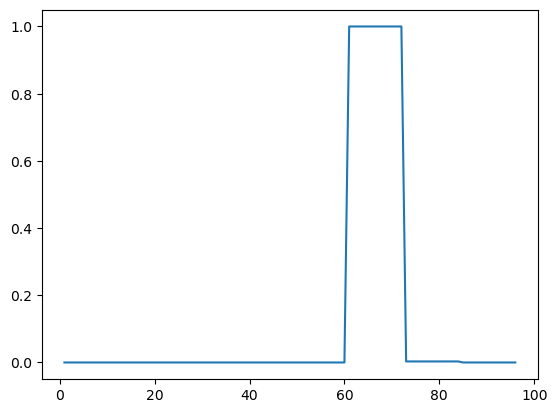

In [16]:
plt.plot(chargingprofile1[50])

Statistical moments

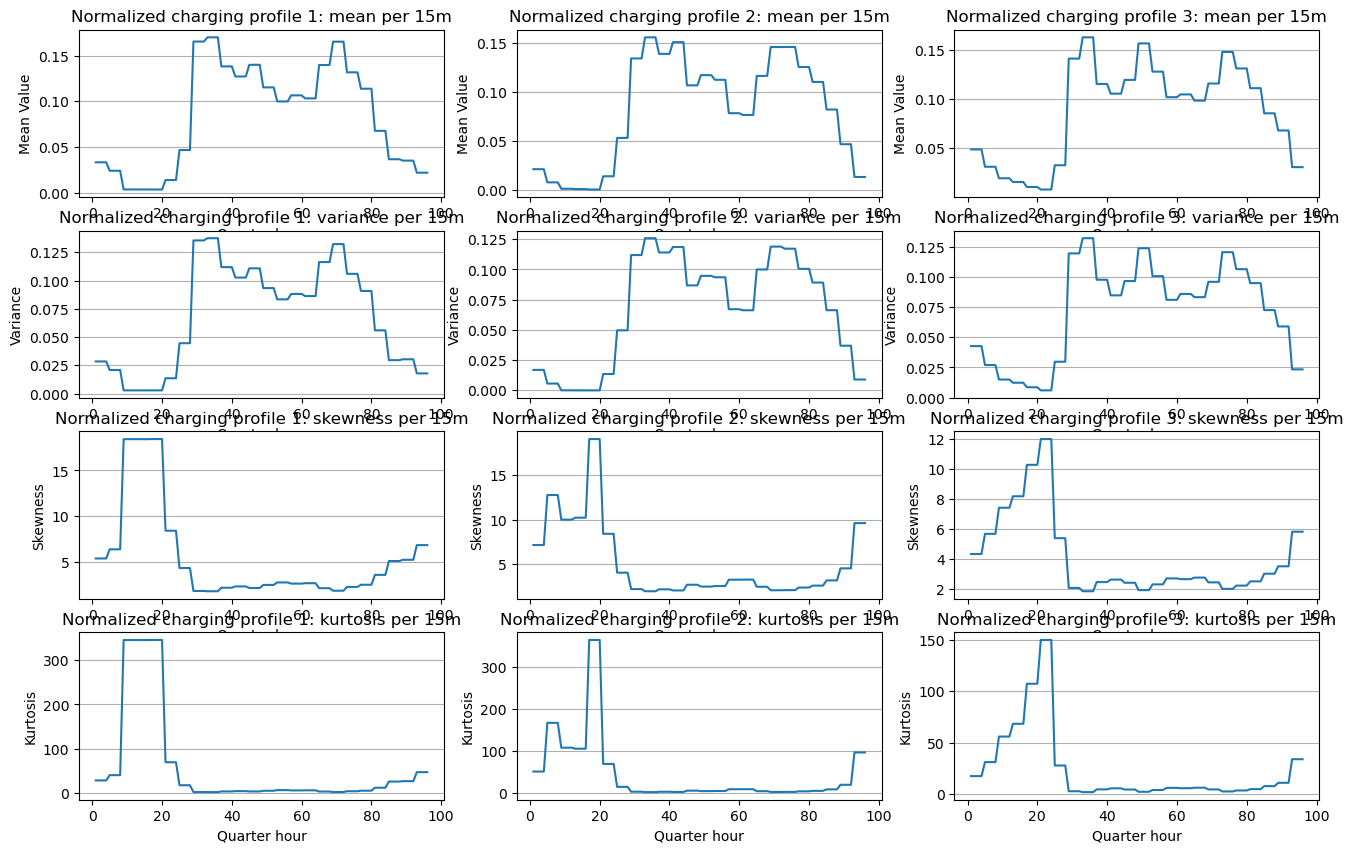

In [17]:
charging1_mean = chargingprofile1.mean(axis=1)
charging1_var = chargingprofile1.var(axis=1)
charging1_skew = chargingprofile1.skew(axis=1)
charging1_kurt = chargingprofile1.kurt(axis=1)

charging2_mean = chargingprofile2.mean(axis=1)
charging2_var = chargingprofile2.var(axis=1)
charging2_skew = chargingprofile2.skew(axis=1)
charging2_kurt = chargingprofile2.kurt(axis=1)

charging3_mean = chargingprofile3.mean(axis=1)
charging3_var = chargingprofile3.var(axis=1)
charging3_skew = chargingprofile3.skew(axis=1)
charging3_kurt = chargingprofile3.kurt(axis=1)

fig, axs = plt.subplots(4, 3, figsize=(16, 10))
#Mean
axs[0,0].plot(charging1_mean.index, charging1_mean)
axs[0,0].set_title('Normalized charging profile 1: mean per 15m')
axs[0,0].set_xlabel('Quarter hour')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(charging2_mean.index, charging2_mean)
axs[0,1].set_title('Normalized charging profile 2: mean per 15m')
axs[0,1].set_xlabel('Quarter hour')
axs[0,1].set_ylabel('Mean Value')
axs[0,1].grid(axis='y')

axs[0,2].plot(charging3_mean.index, charging3_mean)
axs[0,2].set_title('Normalized charging profile 3: mean per 15m')
axs[0,2].set_xlabel('Quarter hour')
axs[0,2].set_ylabel('Mean Value')
axs[0,2].grid(axis='y')

#Variance
axs[1,0].plot(charging1_var.index, charging1_var)
axs[1,0].set_title('Normalized charging profile 1: variance per 15m')
axs[1,0].set_xlabel('Quarter hour')
axs[1,0].set_ylabel('Variance')
axs[1,0].grid(axis='y')

axs[1,1].plot(charging2_var.index, charging2_var)
axs[1,1].set_title('Normalized charging profile 2: variance per 15m')
axs[1,1].set_xlabel('Quarter hour')
axs[1,1].set_ylabel('Variance')
axs[1,1].grid(axis='y')

axs[1,2].plot(charging3_var.index, charging3_var)
axs[1,2].set_title('Normalized charging profile 3: variance per 15m')
axs[1,2].set_xlabel('Quarter hour')
axs[1,2].set_ylabel('Variance')
axs[1,2].grid(axis='y')

#Skewness
axs[2,0].plot(charging1_skew.index, charging1_skew)
axs[2,0].set_title('Normalized charging profile 1: skewness per 15m')
axs[2,0].set_xlabel('Quarter hour')
axs[2,0].set_ylabel('Skewness')
axs[2,0].grid(axis='y')

axs[2,1].plot(charging2_skew.index, charging2_skew)
axs[2,1].set_title('Normalized charging profile 2: skewness per 15m')
axs[2,1].set_xlabel('Quarter hour')
axs[2,1].set_ylabel('Skewness')
axs[2,1].grid(axis='y')

axs[2,2].plot(charging3_skew.index, charging3_skew)
axs[2,2].set_title('Normalized charging profile 3: skewness per 15m')
axs[2,2].set_xlabel('Quarter hour')
axs[2,2].set_ylabel('Skewness')
axs[2,2].grid(axis='y')

#Kurtosis
axs[3,0].plot(charging1_kurt.index, charging1_kurt)
axs[3,0].set_title('Normalized charging profile 1: kurtosis per 15m')
axs[3,0].set_xlabel('Quarter hour')
axs[3,0].set_ylabel('Kurtosis')
axs[3,0].grid(axis='y')

axs[3,1].plot(charging2_kurt.index, charging2_kurt)
axs[3,1].set_title('Normalized charging profile 2: kurtosis per 15m')
axs[3,1].set_xlabel('Quarter hour')
axs[3,1].set_ylabel('Kurtosis')
axs[3,1].grid(axis='y')

axs[3,2].plot(charging3_kurt.index, charging3_kurt)
axs[3,2].set_title('Normalized charging profile 3: kurtosis per 15m')
axs[3,2].set_xlabel('Quarter hour')
axs[3,2].set_ylabel('Kurtosis')
axs[3,2].grid(axis='y')

In [18]:
# Mean of the statistical moments
print('MEAN')
charging1_mean_mean = charging1_mean.mean()
print(round(charging1_mean_mean, 2))
charging2_mean_mean = charging2_mean.mean()
print(round(charging2_mean_mean, 2))
charging3_mean_mean = charging3_mean.mean()
print(round(charging3_mean_mean, 2))

print('VAR')
charging1_mean_var = charging1_var.mean()
print(round(charging1_mean_var, 2))
charging2_mean_var = charging2_var.mean()
print(round(charging2_mean_var, 2))
charging3_mean_var = charging3_var.mean()
print(round(charging3_mean_var, 2))

print('SKEW')
charging1_mean_skew = charging1_skew.mean()
print(round(charging1_mean_skew, 2))
charging2_mean_skew = charging2_skew.mean()
print(round(charging2_mean_skew, 2))
charging3_mean_skew = charging3_skew.mean()
print(round(charging3_mean_skew, 2))

print('KURT')
charging1_mean_kurt = charging1_kurt.mean()
print(round(charging1_mean_kurt, 2))
charging2_mean_kurt = charging2_kurt.mean()
print(round(charging2_mean_kurt, 2))
charging3_mean_kurt = charging3_kurt.mean()
print(round(charging3_mean_kurt, 2))

MEAN
0.08
0.08
0.09
VAR
0.07
0.07
0.07
SKEW
5.41
5.11
4.11
KURT
56.0
44.16
23.43


First difference

In [19]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
# Drop the first row and column (headers)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
# Apply normalization
chargingprofile1 = min_max_normalize(chargingprofile1)
chargingprofile1 = chargingprofile1*23

chargingprofile1 = chargingprofile1.diff(axis=1).drop(chargingprofile1.columns[0], axis=1)
#chargingprofile1 = chargingprofile1.diff().iloc[1:]

chargingprofile2 = pd.read_csv('./data/yearly_charging_profile_2.csv', header=None)
chargingprofile2 = chargingprofile2.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile2.index = range(1, len(chargingprofile2) + 1)
chargingprofile2 = min_max_normalize(chargingprofile2)

chargingprofile2 = chargingprofile2.diff(axis=1).drop(chargingprofile2.columns[0], axis=1)
#chargingprofile2 = chargingprofile2.diff().iloc[1:]

chargingprofile3 = pd.read_csv('./data/yearly_charging_profile_3.csv', header=None)
chargingprofile3 = chargingprofile3.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile3.index = range(1, len(chargingprofile3) + 1)
chargingprofile3 = min_max_normalize(chargingprofile3)

chargingprofile3 = chargingprofile3.diff(axis=1).drop(chargingprofile3.columns[0], axis=1)
#chargingprofile3 = chargingprofile3.diff().iloc[1:]


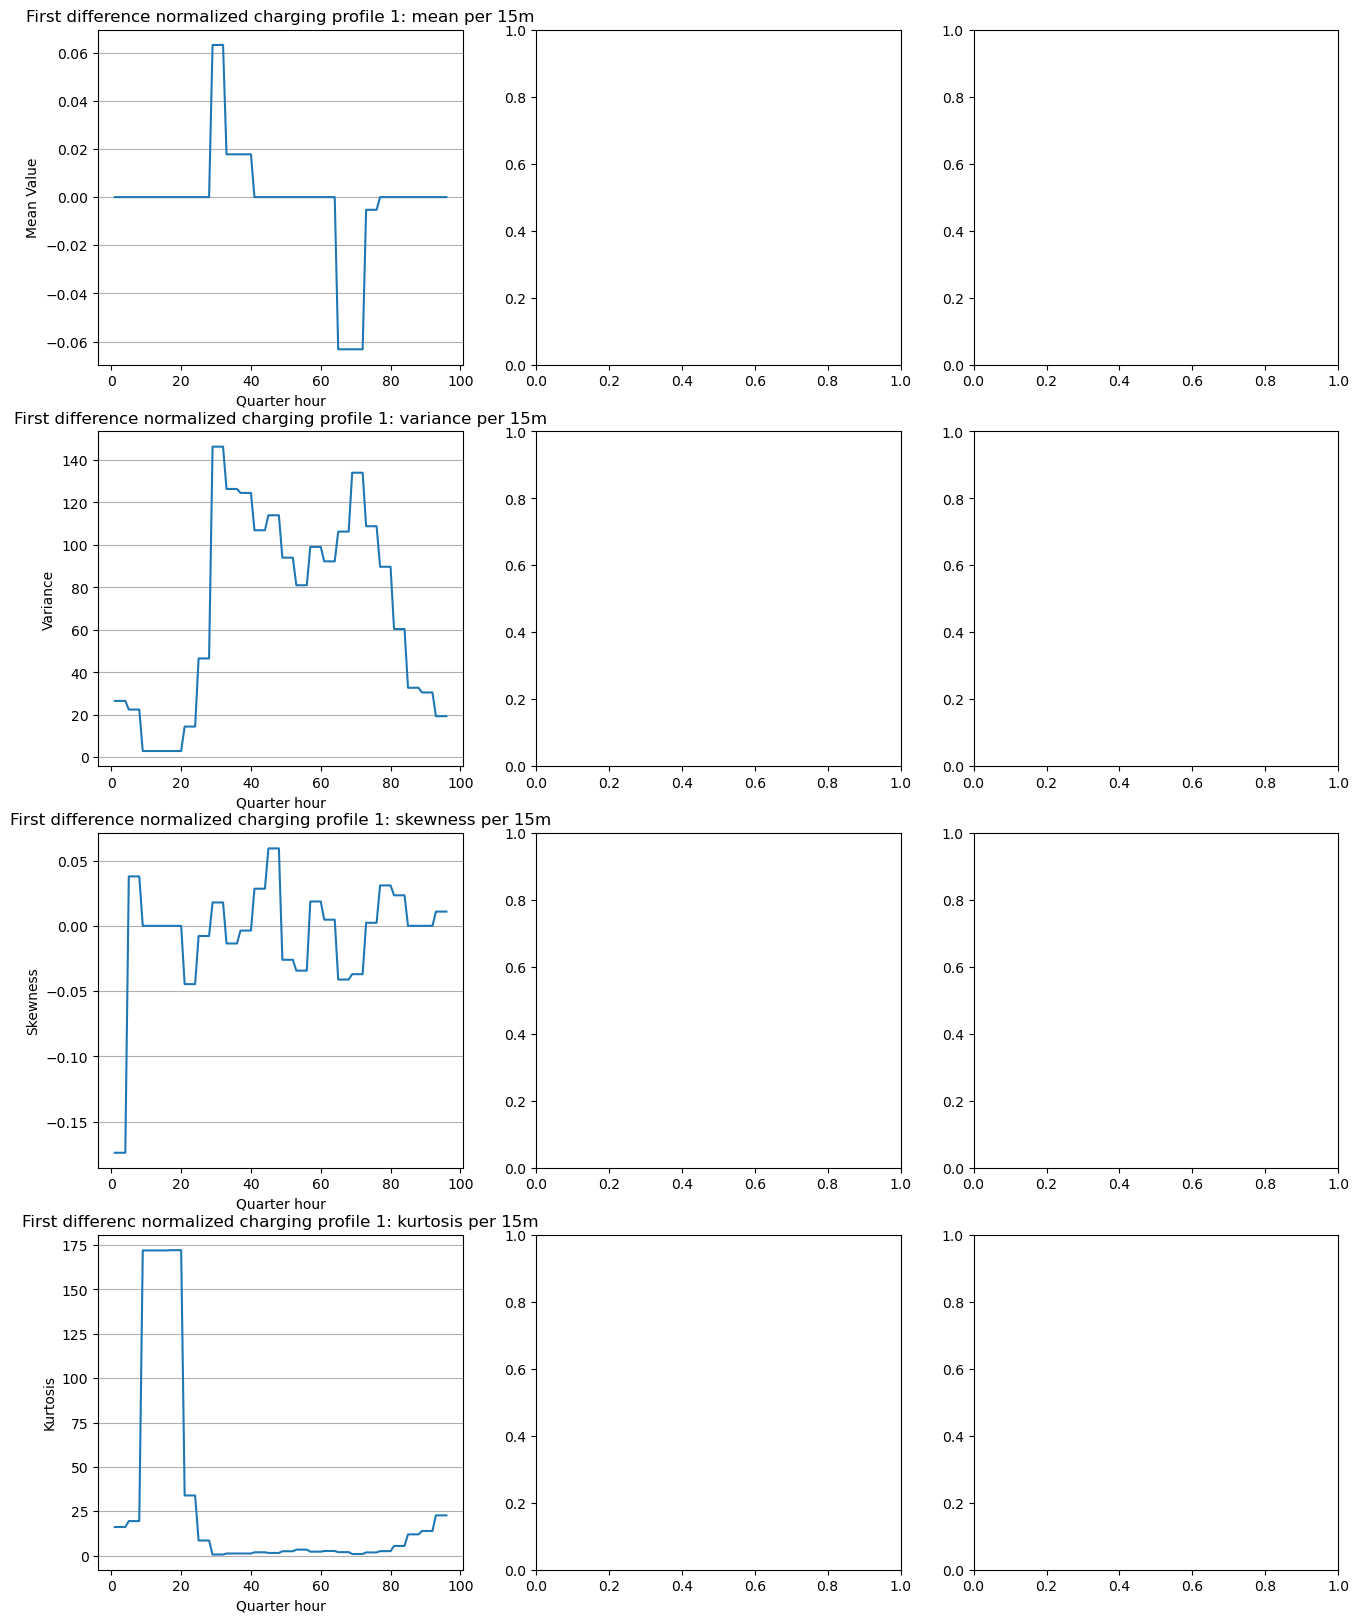

In [20]:
charging1_mean = chargingprofile1.mean(axis=1)
charging1_var = chargingprofile1.var(axis=1)
charging1_skew = chargingprofile1.skew(axis=1)
charging1_kurt = chargingprofile1.kurt(axis=1)

charging2_mean = chargingprofile2.mean(axis=1)
charging2_var = chargingprofile2.var(axis=1)
charging2_skew = chargingprofile2.skew(axis=1)
charging2_kurt = chargingprofile2.kurt(axis=1)

charging3_mean = chargingprofile3.mean(axis=1)
charging3_var = chargingprofile3.var(axis=1)
charging3_skew = chargingprofile3.skew(axis=1)
charging3_kurt = chargingprofile3.kurt(axis=1)

fig, axs = plt.subplots(4, 3, figsize=(16, 20))
#Mean
axs[0,0].plot(charging1_mean.index, charging1_mean)
axs[0,0].set_title('First difference normalized charging profile 1: mean per 15m')
axs[0,0].set_xlabel('Quarter hour')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

# axs[0,1].plot(charging2_mean.index, charging2_mean)
# axs[0,1].set_title('First difference normalized charging profile 2: mean per 15m')
# axs[0,1].set_xlabel('Quarter hour')
# axs[0,1].set_ylabel('Mean Value')
# axs[0,1].grid(axis='y')

# axs[0,2].plot(charging3_mean.index, charging3_mean)
# axs[0,2].set_title('First difference normalized charging profile 3: mean per 15m')
# axs[0,2].set_xlabel('Quarter hour')
# axs[0,2].set_ylabel('Mean Value')
# axs[0,2].grid(axis='y')

#Variance
axs[1,0].plot(charging1_var.index, charging1_var)
axs[1,0].set_title('First difference normalized charging profile 1: variance per 15m')
axs[1,0].set_xlabel('Quarter hour')
axs[1,0].set_ylabel('Variance')
axs[1,0].grid(axis='y')

# axs[1,1].plot(charging2_var.index, charging2_var)
# axs[1,1].set_title('First difference normalized charging profile 2: variance per 15m')
# axs[1,1].set_xlabel('Quarter hour')
# axs[1,1].set_ylabel('Variance')
# axs[1,1].grid(axis='y')

# axs[1,2].plot(charging3_var.index, charging3_var)
# axs[1,2].set_title('First difference normalized charging profile 3: variance per 15m')
# axs[1,2].set_xlabel('Quarter hour')
# axs[1,2].set_ylabel('Variance')
# axs[1,2].grid(axis='y')

#Skewness
axs[2,0].plot(charging1_skew.index, charging1_skew)
axs[2,0].set_title('First difference normalized charging profile 1: skewness per 15m')
axs[2,0].set_xlabel('Quarter hour')
axs[2,0].set_ylabel('Skewness')
axs[2,0].grid(axis='y')

# axs[2,1].plot(charging2_skew.index, charging2_skew)
# axs[2,1].set_title('First difference normalized charging profile 2: skewness per 15m')
# axs[2,1].set_xlabel('Quarter hour')
# axs[2,1].set_ylabel('Skewness')
# axs[2,1].grid(axis='y')

# axs[2,2].plot(charging3_skew.index, charging3_skew)
# axs[2,2].set_title('First differnce normalized charging profile 3: skewness per 15m')
# axs[2,2].set_xlabel('Quarter hour')
# axs[2,2].set_ylabel('Skewness')
# axs[2,2].grid(axis='y')

#Kurtosis
axs[3,0].plot(charging1_kurt.index, charging1_kurt)
axs[3,0].set_title('First differenc normalized charging profile 1: kurtosis per 15m')
axs[3,0].set_xlabel('Quarter hour')
axs[3,0].set_ylabel('Kurtosis')
axs[3,0].grid(axis='y')

# axs[3,1].plot(charging2_kurt.index, charging2_kurt)
# axs[3,1].set_title('First difference normalized charging profile 2: kurtosis per 15m')
# axs[3,1].set_xlabel('Quarter hour')
# axs[3,1].set_ylabel('Kurtosis')
# axs[3,1].grid(axis='y')

# axs[3,2].plot(charging3_kurt.index, charging3_kurt)
# axs[3,2].set_title('First difference normalized charging profile 3: kurtosis per 15m')
# axs[3,2].set_xlabel('Quarter hour')
# axs[3,2].set_ylabel('Kurtosis')
# axs[3,2].grid(axis='y')

In [21]:
# Mean of the statistical moments
print('MEAN')
charging1_mean_mean = charging1_mean.mean()
print(round(charging1_mean_mean, 2))
charging2_mean_mean = charging2_mean.mean()
print(round(charging2_mean_mean, 2))
charging3_mean_mean = charging3_mean.mean()
print(round(charging3_mean_mean, 2))

print('VAR')
charging1_mean_var = charging1_var.mean()
print(round(charging1_mean_var, 2))
charging2_mean_var = charging2_var.mean()
print(round(charging2_mean_var, 2))
charging3_mean_var = charging3_var.mean()
print(round(charging3_mean_var, 2))

print('SKEW')
charging1_mean_skew = charging1_skew.mean()
print(round(charging1_mean_skew, 2))
charging2_mean_skew = charging2_skew.mean()
print(round(charging2_mean_skew, 2))
charging3_mean_skew = charging3_skew.mean()
print(round(charging3_mean_skew, 2))

print('KURT')
charging1_mean_kurt = charging1_kurt.mean()
print(round(charging1_mean_kurt, 2))
charging2_mean_kurt = charging2_kurt.mean()
print(round(charging2_mean_kurt, 2))
charging3_mean_kurt = charging3_kurt.mean()
print(round(charging3_mean_kurt, 2))

MEAN
-0.0
-0.0
-0.0
VAR
70.22
0.13
0.15
SKEW
-0.01
-0.01
-0.03
KURT
28.0
21.96
11.53


Second difference

In [22]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
# Drop the first row and column (headers)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
# Apply normalization
chargingprofile1 = min_max_normalize(chargingprofile1)
chargingprofile1 = chargingprofile1*23
chargingprofile1 = chargingprofile1.diff(axis=1).diff(axis=1).drop(chargingprofile1.columns[0:2], axis=1)
#chargingprofile1 = chargingprofile1.diff().iloc[1:].diff().iloc[1:]

chargingprofile2 = pd.read_csv('./data/yearly_charging_profile_2.csv', header=None)
chargingprofile2 = chargingprofile2.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile2.index = range(1, len(chargingprofile2) + 1)
chargingprofile2 = min_max_normalize(chargingprofile2)

chargingprofile2 = chargingprofile2.diff(axis=1).diff(axis=1).drop(chargingprofile2.columns[0:2], axis=1)
#chargingprofile2 = chargingprofile2.diff().iloc[1:].diff().iloc[1:]

chargingprofile3 = pd.read_csv('./data/yearly_charging_profile_3.csv', header=None)
chargingprofile3 = chargingprofile3.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile3.index = range(1, len(chargingprofile3) + 1)
chargingprofile3 = min_max_normalize(chargingprofile3)

chargingprofile3 = chargingprofile3.diff(axis=1).diff(axis=1).drop(chargingprofile3.columns[0:2], axis=1)
#chargingprofile3 = chargingprofile3.diff().iloc[1:].diff().iloc[1:]



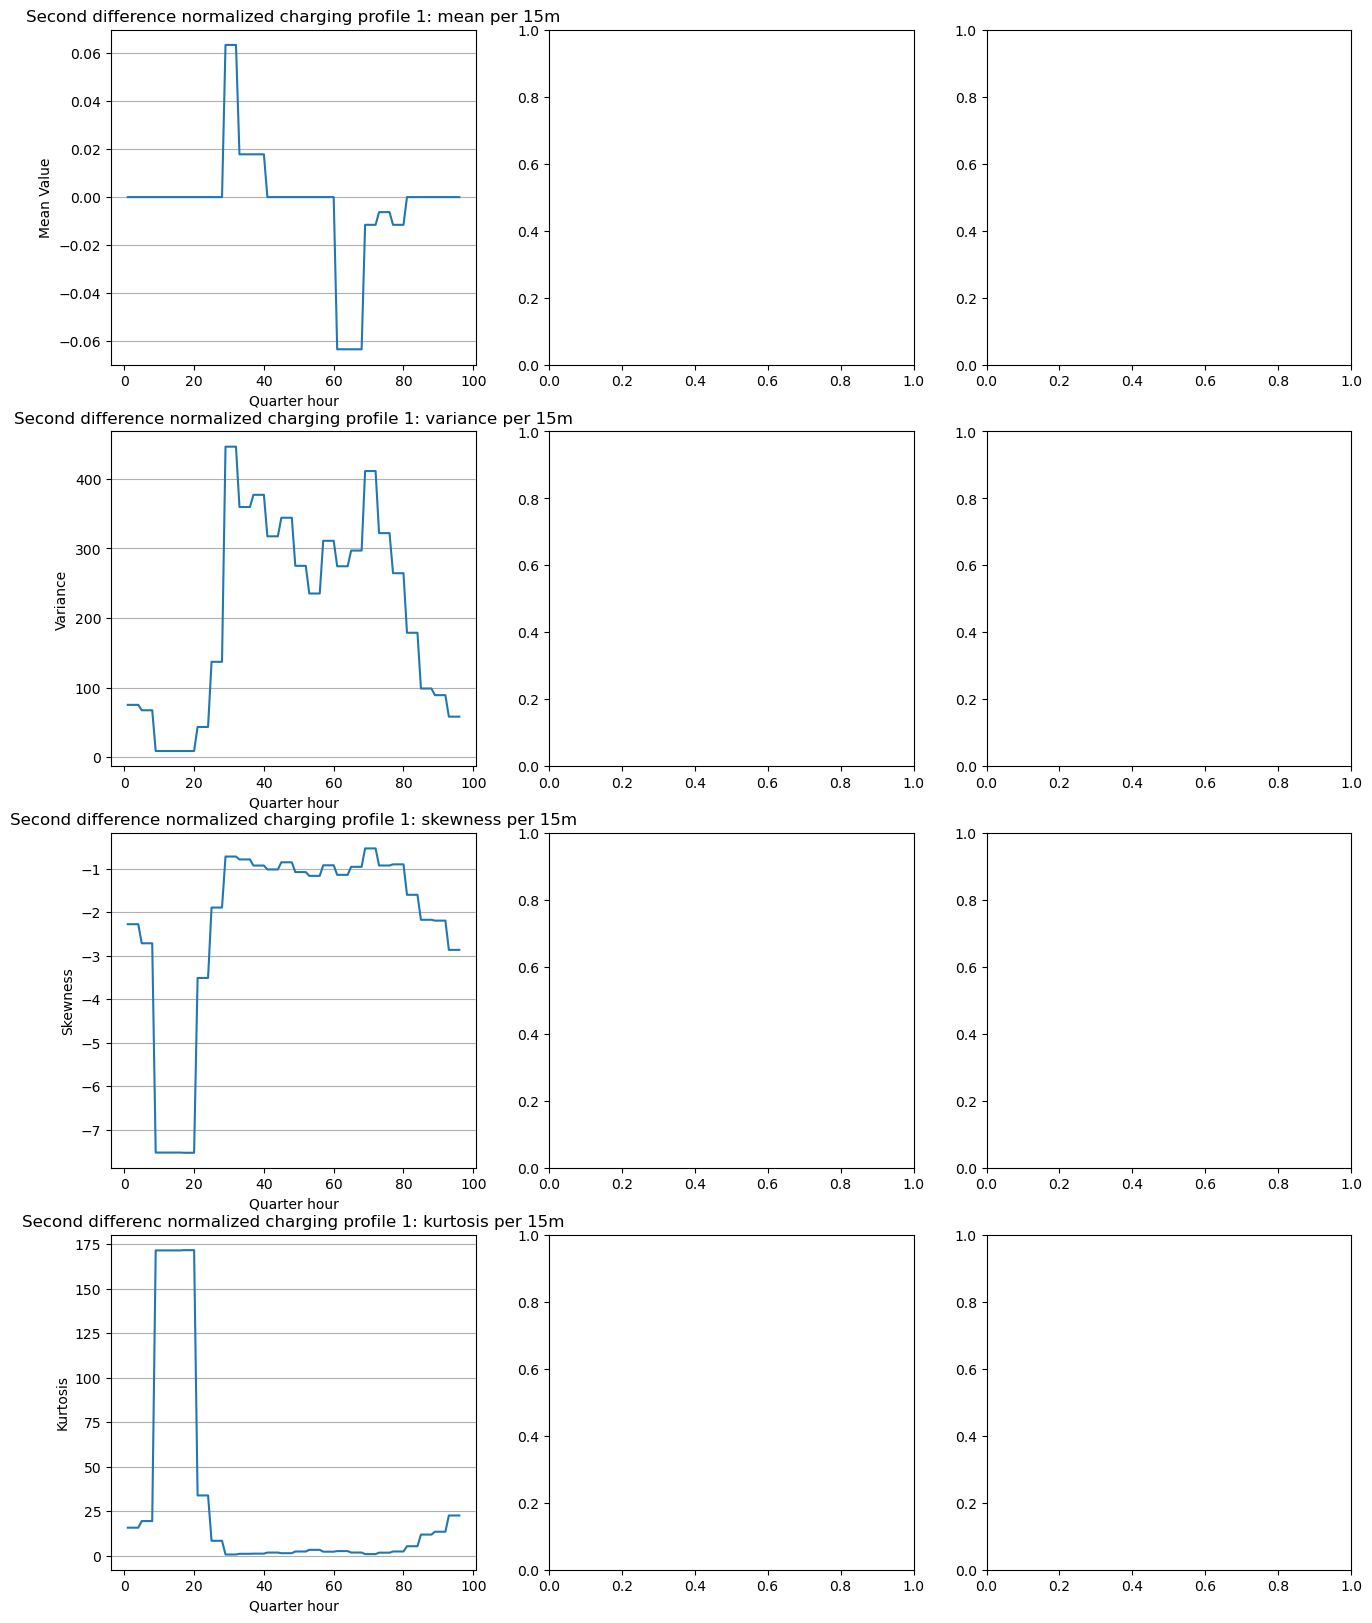

In [23]:
charging1_mean = chargingprofile1.mean(axis=1)
charging1_var = chargingprofile1.var(axis=1)
charging1_skew = chargingprofile1.skew(axis=1)
charging1_kurt = chargingprofile1.kurt(axis=1)

charging2_mean = chargingprofile2.mean(axis=1)
charging2_var = chargingprofile2.var(axis=1)
charging2_skew = chargingprofile2.skew(axis=1)
charging2_kurt = chargingprofile2.kurt(axis=1)

charging3_mean = chargingprofile3.mean(axis=1)
charging3_var = chargingprofile3.var(axis=1)
charging3_skew = chargingprofile3.skew(axis=1)
charging3_kurt = chargingprofile3.kurt(axis=1)

fig, axs = plt.subplots(4, 3, figsize=(16, 20))
#Mean
axs[0,0].plot(charging1_mean.index, charging1_mean)
axs[0,0].set_title('Second difference normalized charging profile 1: mean per 15m')
axs[0,0].set_xlabel('Quarter hour')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

# axs[0,1].plot(charging2_mean.index, charging2_mean)
# axs[0,1].set_title('Second difference normalized charging profile 2: mean per 15m')
# axs[0,1].set_xlabel('Quarter hour')
# axs[0,1].set_ylabel('Mean Value')
# axs[0,1].grid(axis='y')

# axs[0,2].plot(charging3_mean.index, charging3_mean)
# axs[0,2].set_title('Second difference normalized charging profile 3: mean per 15m')
# axs[0,2].set_xlabel('Quarter hour')
# axs[0,2].set_ylabel('Mean Value')
# axs[0,2].grid(axis='y')

#Variance
axs[1,0].plot(charging1_var.index, charging1_var)
axs[1,0].set_title('Second difference normalized charging profile 1: variance per 15m')
axs[1,0].set_xlabel('Quarter hour')
axs[1,0].set_ylabel('Variance')
axs[1,0].grid(axis='y')

# axs[1,1].plot(charging2_var.index, charging2_var)
# axs[1,1].set_title('Second difference normalized charging profile 2: variance per 15m')
# axs[1,1].set_xlabel('Quarter hour')
# axs[1,1].set_ylabel('Variance')
# axs[1,1].grid(axis='y')

# axs[1,2].plot(charging3_var.index, charging3_var)
# axs[1,2].set_title('Second difference normalized charging profile 3: variance per 15m')
# axs[1,2].set_xlabel('Quarter hour')
# axs[1,2].set_ylabel('Variance')
# axs[1,2].grid(axis='y')

#Skewness
axs[2,0].plot(charging1_skew.index, charging1_skew)
axs[2,0].set_title('Second difference normalized charging profile 1: skewness per 15m')
axs[2,0].set_xlabel('Quarter hour')
axs[2,0].set_ylabel('Skewness')
axs[2,0].grid(axis='y')

# axs[2,1].plot(charging2_skew.index, charging2_skew)
# axs[2,1].set_title('Second difference normalized charging profile 2: skewness per 15m')
# axs[2,1].set_xlabel('Quarter hour')
# axs[2,1].set_ylabel('Skewness')
# axs[2,1].grid(axis='y')

# axs[2,2].plot(charging3_skew.index, charging3_skew)
# axs[2,2].set_title('Second differnce normalized charging profile 3: skewness per 15m')
# axs[2,2].set_xlabel('Quarter hour')
# axs[2,2].set_ylabel('Skewness')
# axs[2,2].grid(axis='y')

#Kurtosis
axs[3,0].plot(charging1_kurt.index, charging1_kurt)
axs[3,0].set_title('Second differenc normalized charging profile 1: kurtosis per 15m')
axs[3,0].set_xlabel('Quarter hour')
axs[3,0].set_ylabel('Kurtosis')
axs[3,0].grid(axis='y')

# axs[3,1].plot(charging2_kurt.index, charging2_kurt)
# axs[3,1].set_title('Second difference normalized charging profile 2: kurtosis per 15m')
# axs[3,1].set_xlabel('Quarter hour')
# axs[3,1].set_ylabel('Kurtosis')
# axs[3,1].grid(axis='y')

# axs[3,2].plot(charging3_kurt.index, charging3_kurt)
# axs[3,2].set_title('Second difference normalized charging profile 3: kurtosis per 15m')
# axs[3,2].set_xlabel('Quarter hour')
# axs[3,2].set_ylabel('Kurtosis')
# axs[3,2].grid(axis='y')

In [24]:
# Mean of the statistical moments
print('MEAN')
charging1_mean_mean = charging1_mean.mean()
print(round(charging1_mean_mean, 2))
charging2_mean_mean = charging2_mean.mean()
print(round(charging2_mean_mean, 2))
charging3_mean_mean = charging3_mean.mean()
print(round(charging3_mean_mean, 2))

print('VAR')
charging1_mean_var = charging1_var.mean()
print(round(charging1_mean_var, 2))
charging2_mean_var = charging2_var.mean()
print(round(charging2_mean_var, 2))
charging3_mean_var = charging3_var.mean()
print(round(charging3_mean_var, 2))

print('SKEW')
charging1_mean_skew = charging1_skew.mean()
print(round(charging1_mean_skew, 2))
charging2_mean_skew = charging2_skew.mean()
print(round(charging2_mean_skew, 2))
charging3_mean_skew = charging3_skew.mean()
print(round(charging3_mean_skew, 2))

print('KURT')
charging1_mean_kurt = charging1_kurt.mean()
print(round(charging1_mean_kurt, 2))
charging2_mean_kurt = charging2_kurt.mean()
print(round(charging2_mean_kurt, 2))
charging3_mean_kurt = charging3_kurt.mean()
print(round(charging3_mean_kurt, 2))

MEAN
-0.0
-0.0
-0.0
VAR
208.74
0.4
0.45
SKEW
-2.24
-2.12
-1.67
KURT
27.87
21.91
11.5
